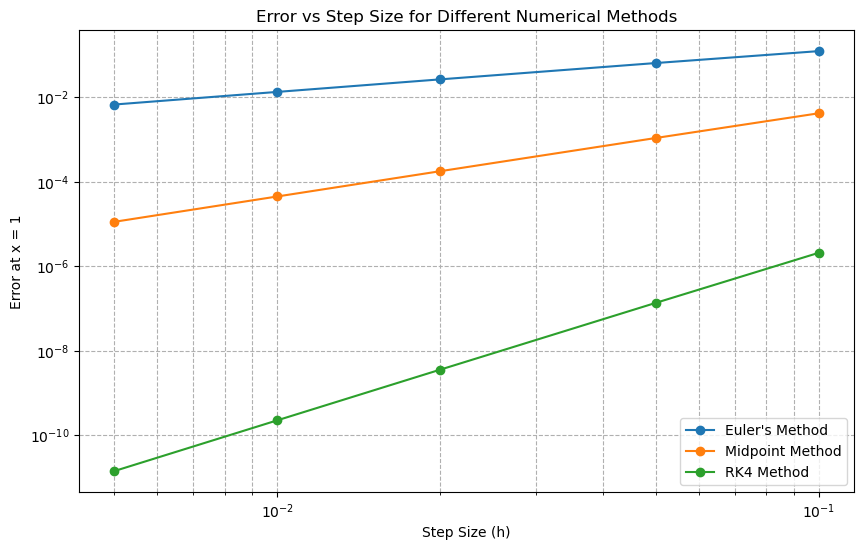

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
    return y

# Define the exact solution for comparison
def exact_solution(x):
    return np.exp(x)
def euler_method(f, y0, x_range, h):
    x_values = np.arange(x_range[0], x_range[1] + h, h)
    y_values = [y0]
    for x in x_values[:-1]:
        y_values.append(y_values[-1] + h * f(x, y_values[-1]))
    return x_values, np.array(y_values)
def midpoint_method(f, y0, x_range, h):
    x_values = np.arange(x_range[0], x_range[1] + h, h)
    y_values = [y0]
    for x in x_values[:-1]:
        k1 = h * f(x, y_values[-1])
        k2 = h * f(x + h / 2, y_values[-1] + k1 / 2)
        y_values.append(y_values[-1] + k2)
    return x_values, np.array(y_values)
def rk4_method(f, y0, x_range, h):
    x_values = np.arange(x_range[0], x_range[1] + h, h)
    y_values = [y0]
    for x in x_values[:-1]:
        k1 = h * f(x, y_values[-1])
        k2 = h * f(x + h / 2, y_values[-1] + k1 / 2)
        k3 = h * f(x + h / 2, y_values[-1] + k2 / 2)
        k4 = h * f(x + h, y_values[-1] + k3)
        y_values.append(y_values[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return x_values, np.array(y_values)
# Define parameters
y0 = 1
x_range = (0, 1)
step_sizes = [0.1, 0.05, 0.02, 0.01, 0.005]
errors_euler = []
errors_midpoint = []
errors_rk4 = []

# Calculate errors for each method and step size
for h in step_sizes:
    _, y_euler = euler_method(f, y0, x_range, h)
    _, y_midpoint = midpoint_method(f, y0, x_range, h)
    _, y_rk4 = rk4_method(f, y0, x_range, h)
    
    # Exact solution at x=1
    y_exact = exact_solution(x_range[1])
    
    # Errors at x=1 for each method
    errors_euler.append(abs(y_euler[-1] - y_exact))
    errors_midpoint.append(abs(y_midpoint[-1] - y_exact))
    errors_rk4.append(abs(y_rk4[-1] - y_exact))

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(step_sizes, errors_euler, label="Euler's Method", marker='o')
plt.loglog(step_sizes, errors_midpoint, label="Midpoint Method", marker='o')
plt.loglog(step_sizes, errors_rk4, label="RK4 Method", marker='o')
plt.xlabel("Step Size (h)")
plt.ylabel("Error at x = 1")
plt.title("Error vs Step Size for Different Numerical Methods")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


The plot illustrates how the error in numerical methods for solving ODEs decreases with the step size \(h\), showing clear differences among Euler’s method, the midpoint method, and RK4.

- **Euler’s Method** (blue line): As a first-order method, it has the highest error for any given step size, with error decreasing linearly as \(O(h)\). This makes it the least accurate approach here.

- **Midpoint Method** (orange line): This second-order method shows significantly reduced error compared to Euler’s method, scaling as \(O(h^2)\). It offers a good balance between accuracy and computational effort.

- **RK4 Method** (green line): As a fourth-order method, RK4 achieves the smallest error, with error decreasing as \(O(h^4)\). This method is computationally more demanding but yields very accurate results, especially as the step size decreases.

Overall, higher-order methods like RK4 converge faster and are more accurate than lower-order methods, as demonstrated by the much lower error for a given step size.


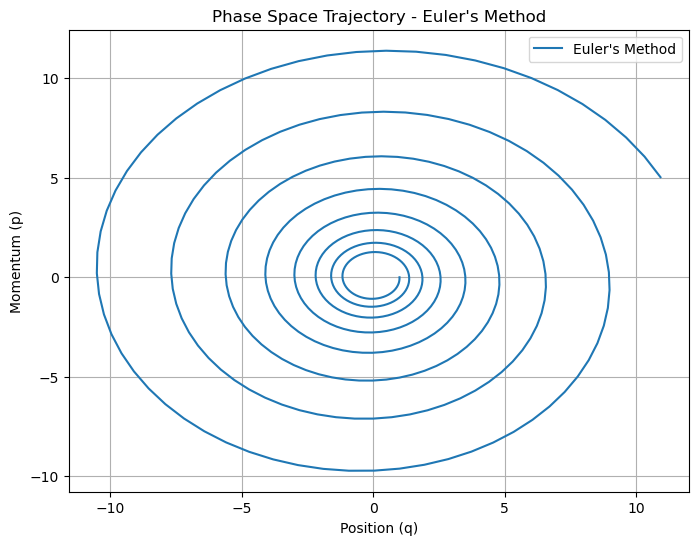

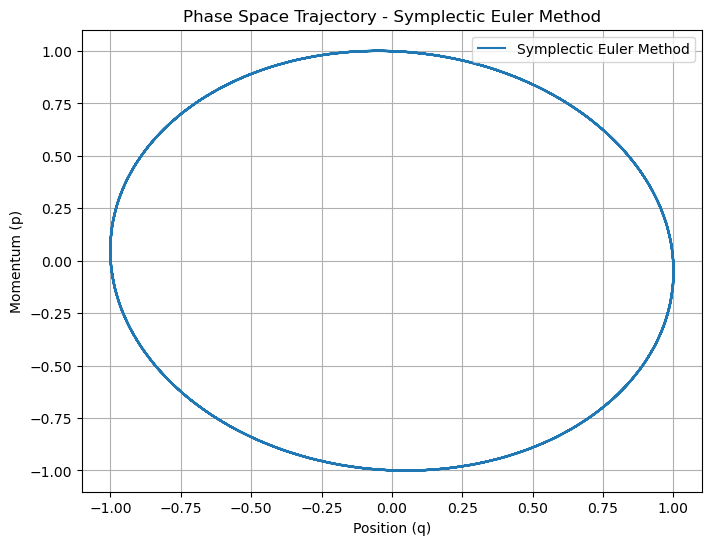

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.1  
num_steps = 500  
q0, p0 = 1.0, 0.0  
# Euler's Method
def euler_method(q0, p0, h, num_steps):
    q_values = [q0]
    p_values = [p0]
    q, p = q0, p0
    for _ in range(num_steps):
        q_new = q + h * p
        p_new = p - h * q
        q, p = q_new, p_new
        q_values.append(q)
        p_values.append(p)
    return np.array(q_values), np.array(p_values)

# Run Euler's method
q_euler, p_euler = euler_method(q0, p0, h, num_steps)

# Plot the trajectory in phase space
plt.figure(figsize=(8, 6))
plt.plot(q_euler, p_euler, label="Euler's Method")
plt.xlabel("Position (q)")
plt.ylabel("Momentum (p)")
plt.title("Phase Space Trajectory - Euler's Method")
plt.legend()
plt.grid()
plt.show()
# Symplectic Euler Method
def symplectic_euler_method(q0, p0, h, num_steps):
    q_values = [q0]
    p_values = [p0]
    q, p = q0, p0
    for _ in range(num_steps):
        q_new = q + h * p
        p_new = p - h * q_new
        q, p = q_new, p_new
        q_values.append(q)
        p_values.append(p)
    return np.array(q_values), np.array(p_values)

q_symplectic, p_symplectic = symplectic_euler_method(q0, p0, h, num_steps)

# Plot the trajectory in phase space
plt.figure(figsize=(8, 6))
plt.plot(q_symplectic, p_symplectic, label="Symplectic Euler Method")
plt.xlabel("Position (q)")
plt.ylabel("Momentum (p)")
plt.title("Phase Space Trajectory - Symplectic Euler Method")
plt.legend()
plt.grid()
plt.show()


### Observations

- **Euler’s Method**:
  - The phase space plot for Euler’s method shows an outward spiral, indicating that the method does not conserve energy.
  - As the trajectory moves further away from the origin over time, it represents a gain in energy, which is unphysical for a conservative system like a mass on a spring.
  - This energy increase suggests that Euler's method is unsuitable for accurately modeling long-term dynamics in Hamiltonian systems.

- **Symplectic Euler Method**:
  - The phase space plot for the symplectic Euler method shows a closed loop or near-elliptical orbit around the origin.
  - This trajectory indicates better conservation of energy over time and greater stability of the solution.
  - The symplectic Euler method conserves phase space volume (symplecticity), which makes it more accurate for Hamiltonian systems and avoids the unbounded growth seen with Euler’s method.

### Summary
In conclusion, while both methods approximate the dynamics, the symplectic Euler method provides a more accurate and stable representation of the mass-spring system’s motion by conserving energy and maintaining a bounded trajectory in phase space. This makes it a preferred choice for modeling Hamiltonian systems where energy conservation is essential.


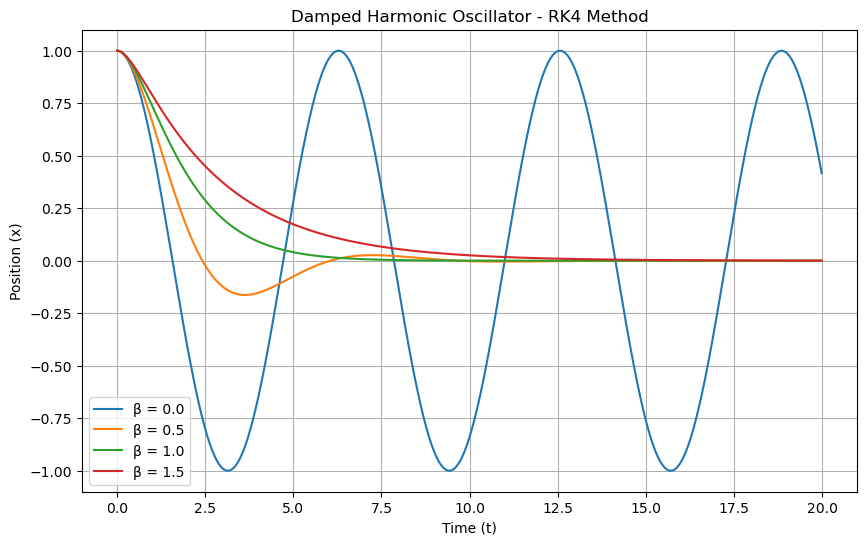

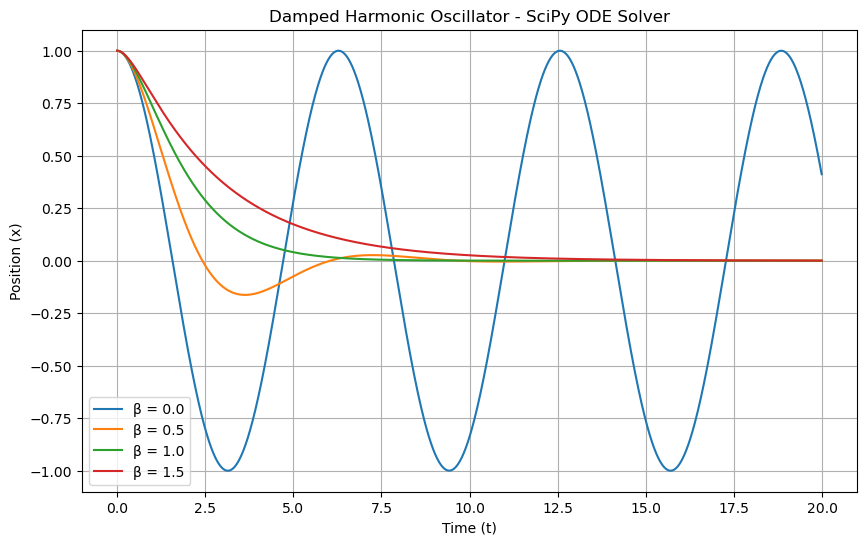

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
omega_0 = 1.0  
beta_values = [0.0, 0.5, 1.0, 1.5] 
h = 0.01  
t_max = 20  
num_steps = int(t_max / h)

# RK4 Method
def rk4_step(f, y, t, h):
    k1 = h * f(y, t)
    k2 = h * f(y + k1 / 2, t + h / 2)
    k3 = h * f(y + k2 / 2, t + h / 2)
    k4 = h * f(y + k3, t + h)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Define the system of equations
def damped_oscillator(y, t, beta, omega_0):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = -2 * beta * omega_0 * y2 - omega_0**2 * y1
    return np.array([dy1_dt, dy2_dt])

# Solve the system for different beta values using RK4
t_values = np.arange(0, t_max, h)
results_rk4 = {}

for beta in beta_values:
    y = np.array([1.0, 0.0])  # initial conditions: x=1, dx/dt=0
    y_values = [y]
    
    for t in t_values[:-1]:
        y = rk4_step(lambda y, t: damped_oscillator(y, t, beta, omega_0), y, t, h)
        y_values.append(y)
    
    results_rk4[beta] = np.array(y_values)

# Plot results for RK4
plt.figure(figsize=(10, 6))
for beta in beta_values:
    plt.plot(t_values, results_rk4[beta][:, 0], label=f'β = {beta}')
plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.title("Damped Harmonic Oscillator - RK4 Method")
plt.legend()
plt.grid()
plt.show()
from scipy.integrate import solve_ivp

def oscillator_ivp(t, y, beta, omega_0):
    return damped_oscillator(y, t, beta, omega_0)

results_scipy = {}

for beta in beta_values:
    sol = solve_ivp(lambda t, y: oscillator_ivp(t, y, beta, omega_0), [0, t_max], [1.0, 0.0], t_eval=t_values)
    results_scipy[beta] = sol.y[0]

# Plot results for SciPy's solver
plt.figure(figsize=(10, 6))
for beta in beta_values:
    plt.plot(t_values, results_scipy[beta], label=f'β = {beta}')
plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.title("Damped Harmonic Oscillator - SciPy ODE Solver")
plt.legend()
plt.grid()
plt.show()


Both the RK4 method and SciPy’s solver provide similar results